In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.append('/Users/firasmidani/rab_fm/git/amiga/')

# from libs.utils import subsetDf
# from libs.plot import largeTickLabels
 
# from scipy.stats import spearmanr
from scipy.cluster.hierarchy import dendrogram, linkage

# from matplotlib.ticker import FuncFormatter, MultipleLocator
from matplotlib import rcParams#, colors

from scipy.stats import spearmanr
# from seaborn import clustermap

rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = 'Arial'

In [3]:
def read_csv(fpath): 
    return pd.read_csv(fpath,sep='\t',header=0,index_col=0)

def subsetDf(df,criteria):
    '''
    Retains only rows in a pandas.DataFrame that match select criteria. 

    Args:
        df (pandas.DataFrame)
        criteria (dictionary): keys (str) are column headers in df, and values (list) are respective column values

    Returns (pandas.DataFrame)
    '''

    if criteria is None: return df

    # if a criteria (dictionary) has a value that is not list format, put it into a list
    for key,value in criteria.items():
        if not isinstance(value,list):
            criteria[key] = [value]

    return df[df.isin(criteria).sum(1)==len(criteria)]

def largeTickLabels(ax,fontsize=20):
    [ii.set(fontsize=fontsize) for ii in ax.get_xticklabels()+ax.get_yticklabels()]

def thicken_spines(ax,lw=4): [ii.set(lw=lw) for _,ii in ax.spines.items()]


In [4]:
def get_growth_values(df,sub_group=None,index=[]):#,keep_zeros=False):
    
    if isinstance(index,int) | isinstance(index,float): index = [index]
    
    if sub_group is None: sys.exit('Fatal Error: Missing input vaules')
        
    if (sub_group == 'Polysaccharides') | (sub_group == 'Poly'): sub_group = 'Polysaccharides:'
    if (sub_group == 'Monosaccharides') | (sub_group == 'Mono'): sub_group = 'Monosaccharides:'

    cond_1 = df.columns.get_level_values('Substrate_Group') == sub_group
    cond_2 = df.columns.get_level_values('Normalization') =='Raw values'
    cond_3 = df.columns.get_level_values('Parameter') =='Growth'
    df_sub = df.iloc[:, cond_1 & cond_2 & cond_3]
    
    df_sub = df_sub.droplevel([0,1,3,4,5],axis=1)
    df_meta = df.droplevel([0,1,2,3,4],axis=1).loc[:,['Species1 ','Strain']]

    df_sub = df_meta.join(df_sub).loc[range(354),:]
    
    if len(index)==1: 
        df_sub = pd.DataFrame(df_sub.loc[index,:])
    elif len(index)>1:
        df_sub = df_sub.loc[index,:]
    else: 
        df_sub =  df_sub
    
    df_sub = df_sub.set_index(['Species1 ','Strain'])
    
    return df_sub

def get_pos_elements(arr): return [ii for ii in arr if ii>0]

def describe_without_zeros(row): return pd.Series(get_pos_elements(row)).describe()

In [5]:
color_dict = {'B. ovatus':'navy','B. fragilis':'red',
              'B. thetaiotaomicron':'green','B. vulgatus':'gold'}

In [6]:
ParentPath = '/Users/firasmidani/Box_Duke/project_davidlab/LAD_LAB_Personnel/Firas/'
ParentPath+= 'FIRAS_EXPERIMENTS/_2022_03_31_bacteroides_data_analysis'

In [7]:
fname = ParentPath + '/data/pudlo_et_al_media-2_annotated.xlsx'
df = pd.read_excel(fname,sheet_name='Growth',skiprows=0,header=[0,1,2,3,4,5],index_col=0)
print(df.shape)
df.head()

/Users/firasmidani/local_applications/miniconda3/envs/RABPY/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


(360, 278)


Substrate_Group           Substrate_Group              \
Polysaccharide_Group Polysaccharide_Group               
Polysaccharide             Polysaccharide               
Normalization               Normalization               
Normalization_Method Normalization_Method               
Parameter                       Species1       Strain   
0.0                             B. caccae  ATCC 43185   
1.0                             B. caccae   VPI-3452A   
2.0                             B. caccae   VPI-B6-11   
3.0                             B. caccae       WH110   
4.0                             B. caccae   VPI-C14-3   

Substrate_Group                                                      \
Polysaccharide_Group                                                  
Polysaccharide                                                        
Normalization                                                         
Normalization_Method                                                  
Parameter            % identity to species type strain (bp covered)   
0.0                                               100 (type strain)   
1.0                                               100 (type strain)   
2.0                                                  99.8 (836/838)   
3.0                                                  99.6 (795/798)   
4.0                                                  99.6 (830/833)   

Substrate_Group                                                            \
Polysaccharide_Group                                                        
Polysaccharide                                                              
Normalization                                                               
Normalization_Method                                                        
Parameter            Host species Isolation period Public genome sequence   
0.0                         Human         pre-1980             PRJNA54521   
1.0                         Human         pre-1980                     no   
2.0                         Human         pre-1980                     no   
3.0                         Human          1995-99                     no   
4.0                         Human         pre-1980                     no   

Substrate_Group                                   \
Polysaccharide_Group                               
Polysaccharide                                     
Normalization                                      
Normalization_Method                               
Parameter            Growth medium   Growth file   
0.0                            1.0  ECM2010_0418   
1.0                            1.0  ECM2011_0177   
2.0                            1.0  ECM2011_0179   
3.0                            1.0  ECM2011_0007   
4.0                            1.0  ECM2011_0181   

Substrate_Group                              Polysaccharides:  \
Polysaccharide_Group Starches and starch-like polysaccharides   
Polysaccharide             Pullulan (Aureobasidium pullulans)   
Normalization                                      Raw values   
Normalization_Method                       Unnamed: 9_level_4   
Parameter                                              Growth   
0.0                                                       0.0   
1.0                                                       0.0   
2.0                                                       0.0   
3.0                                                       0.0   
4.0                                                       0.0   

Substrate_Group                           ...          Monosaccharides:  \
Polysaccharide_Group                      ...      Unnamed: 269_level_1   
Polysaccharide                            ...                    Ribose   
Normalization                             ...         Normalized values   
Normalization_Method Unnamed: 10_level_4  ... Normalized by strain only   
Parameter                           Rate  ...                    Growth   
0.0

In [8]:
cond = df.columns.get_level_values('Parameter') =='Strain'
df_strain = df.iloc[:, cond].dropna()
df_strain = df_strain.droplevel([0,1,2,3,4],axis=1)

cond = df.columns.get_level_values('Parameter') =='Species1 '
df_species = df.iloc[:,cond].dropna()
df_species = df_species.droplevel([0,1,2,3,4],axis=1)

df_strain = df_species.join(df_strain)
df_strain = subsetDf(df_strain,{'Strain':['NCTC 9343, ATCC 25285',
                                          'ATCC 8483',
                                          'VPI-5482, ATCC 29148',
                                          'ATCC 8482']})
df_strain

Parameter,Species1,Strain
44.0,B. fragilis,"NCTC 9343, ATCC 25285"
110.0,B. ovatus,ATCC 8483
157.0,B. thetaiotaomicron,"VPI-5482, ATCC 29148"
250.0,B. vulgatus,ATCC 8482


In [10]:
substrates_order = ['Rhamnose','mucin O-linked glycans (porcine gastric mucosa)',
                    'N-acetyl glucosamine',
                    'Arabinogalactan (larch wood)','Pectic galactan (lupin)','Pectic galactan (potato)',
                    'Glucuronic acid','Galactose','Pullulan (Aureobasidium pullulans)',
                    'Xylan (water soluble from oat spelt)','Arabinose','Cellobiose','Galactomannan (carob)',
                    'Inulin (chicory root)',
                    'Laminarin','Glucomannan (konjac)','Fructose','Glucose','Mannose',
                    'Amylopectin (maize)','Amylopectin (potato)']


len(substrates_order)

21

In [11]:
cond_1= df.columns.get_level_values('Normalization') =='Raw values'
cond_2= df.columns.get_level_values('Parameter') =='Growth'

df_strain_growth = df.iloc[:, cond_1 & cond_2]
df_strain_growth = df_strain_growth.loc[df_strain.index.values,:]
df_strain_growth = df_strain_growth.droplevel([0,1,3,4,5],axis=1)

df_strain_growth = df_strain_growth.T.loc[substrates_order,:]
df_strain_growth.columns = [df_strain.loc[ii,'Species1 '] for ii in df_strain_growth.columns]
df_strain_growth = df_strain_growth.loc[:,['B. ovatus','B. fragilis','B. thetaiotaomicron','B. vulgatus']]
df_strain_growth.loc['Water',:] = [0]*4
df_strain_growth

,B. ovatus,B. fragilis,B. thetaiotaomicron,B. vulgatus
Polysaccharide,,,,
Rhamnose,0.5795,0.0000,0.6715,0.6125
mucin O-linked glycans (porcine gastric mucosa),0.0000,0.7210,0.5515,0.3000
N-acetyl glucosamine,0.7780,0.5415,1.0045,0.9275
Arabinogalactan (larch wood),0.1450,0.0000,0.8985,0.0000
Pectic galactan (lupin),0.8100,0.0000,0.8900,0.0000
Pectic galactan (potato),0.2900,0.0000,1.1400,0.1500
Glucuronic acid,0.6900,0.0000,0.8475,0.0000
Galactose,0.8665,0.2960,1.3935,0.6395
Pullulan (Aureobasidium pullulans),0.9630,1.2710,1.2305,0.1100


In [12]:
group_poly = get_growth_values(df,sub_group="Poly",index=df_strain.index)
group_mono = get_growth_values(df,sub_group="Mono",index=df_strain.index)

SpearmanrResult(correlation=0.6072319449901503, pvalue=4.794238485486569e-37)
[[0.59003401]]
[0.3785688]


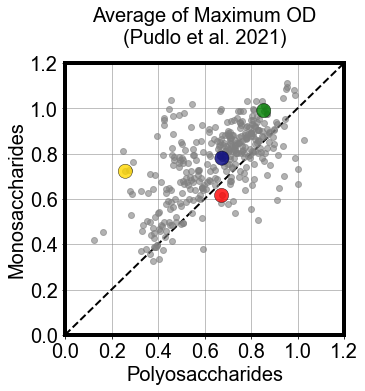

In [13]:
fig,ax = plt.subplots(figsize=[5,5])

### all points

group_poly = get_growth_values(df,sub_group="Poly")
group_mono = get_growth_values(df,sub_group="Mono")

x_df = group_poly.apply(lambda row: describe_without_zeros(row.values),axis=1)#.describe()
y_df = group_mono.apply(lambda row: describe_without_zeros(row.values),axis=1)#.describe()

x_all = x_df['mean'].values
y_all = y_df['mean'].values

ax.scatter(x_all,y_all,alpha=0.6,zorder=3,color='gray')

print(spearmanr(x_all,y_all))

from sklearn.linear_model import LinearRegression
print(LinearRegression().fit(x_all[:,np.newaxis],y_all[:,np.newaxis]).coef_)
print(LinearRegression().fit(x_all[:,np.newaxis],y_all[:,np.newaxis]).intercept_)

## my isolates

bacteroides_poly = get_growth_values(df,sub_group="Poly",index=df_strain.index)
bacteroides_mono = get_growth_values(df,sub_group="Mono",index=df_strain.index)

x_df = bacteroides_poly.apply(lambda row: describe_without_zeros(row.values),axis=1)#.describe()
y_df = bacteroides_mono.apply(lambda row: describe_without_zeros(row.values),axis=1)#.describe()

x = x_df['mean'].values
y = y_df['mean'].values
c = [color_dict[ii] for ii in y_df.index.get_level_values('Species1 ')]
ax.scatter(x,y,s=200,marker='o',color=c,alpha=0.8,lw=0.5,edgecolor='black',zorder=4)


ax.set_xlim([0,1.2])
ax.set_ylim([0,1.2])

ax.plot([0,1.2],[0,1.2],ls='--',lw=2,color='black')

largeTickLabels(ax)
thicken_spines(ax)

ax.set_title('Average of Maximum OD\n(Pudlo et al. 2021)',fontsize=20,y=1.05)

ax.set_xlabel('Polyosaccharides',fontsize=20)
ax.set_ylabel('Monosaccharides',fontsize=20)

ax.xaxis.grid(which="major",lw=0.5,color='gray',zorder=1)
ax.yaxis.grid(which="major",lw=0.5,color='gray',zorder=1)

plt.savefig(ParentPath + '/figures/comparison_pudlo_2021_scatter_b.pdf',bbox_inches='tight')

**Import Midani count data**

In [15]:
max_counts_species = read_csv(ParentPath + '/tables/max_counts_species_substrates.txt')
max_counts_species.head()

,BO,BF,BT,BV,Substrate_Label,Substrate_Type,Substrate_Group
Substrate,,,,,,,
Amylopectin,9896.5,15626.0,13231.5,11168.5,Amylopectin,Polysaccharide,Complex Sugars
Arabinogalactan,47679.5,26520.5,62676.0,88710.5,Arabinogalactan,Polysaccharide,Complex Sugars
Arabinose,56774.0,7484.5,90899.5,111965.0,Arabinose,Monosaccharide,Simple Sugars
Cellobiose,67683.5,15749.5,72016.0,4661.0,Cellobiose,Disaccharide,Simple Sugars
Chitin,2998.0,10828.0,11576.0,7723.0,Chitin,Polysaccharide,Complex Sugars


**match Pudlo substrates with Midani substrates** 

In [17]:
df_pudlo_map_sub = [['Amylopectin','Amylopectin (maize)'],
                      ['Amylopectin','Amylopectin (potato)'],
                      ['Arabinogalactan','Arabinogalactan (larch wood)'],
                      ['Arabinose','Arabinose'],
                      ['Cellobiose','Cellobiose'],
                      ['Fructose','Fructose'],
                      ['Galactomannan_Guar','Galactomannan (carob)'],
                      ['Galactomannan_Locust','Galactomannan (carob)'],
                      ['Galactose','Galactose'],
                      ['Glucomannan','Glucomannan (konjac)'],
                      ['Glucose','Glucose'],
                      ['Glucuronic Acid','Glucuronic acid'],
                      ['Inulin_Sigma','Inulin (chicory root)'],
                      ['Inulin_Alfa_Aesar','Inulin (Chicory root)'],
                      ['Laminarin','Laminarin'],
                      ['Mannose','Mannose'],
                      ['Mucin','mucin O-linked glycans (porcine gastric mucosa)'],
                      ['N-Acetyl-Glucosamine','N-acetyl glucosamine'],
                      ['Pectin_Apple','Pectic galactan (lupin)'], 
                      ['Pectin_Apple','Pectic galactan (citrus)'],
                      ['Pullulan','Pullulan (Aureobasidium pullulans)'],
                      ['Rhamnose','Rhamnose'],
                      ['Xylan','Xylan (water soluble from oat spelt)'],
                      ['Water','Water']]


df_pudlo_map_sub = pd.DataFrame(df_pudlo_map_sub,columns=['Midani','Pudlo'])
df_pudlo_map_sub.head()

,Midani,Pudlo
0,Amylopectin,Amylopectin (maize)
1,Amylopectin,Amylopectin (potato)
2,Arabinogalactan,Arabinogalactan (larch wood)
3,Arabinose,Arabinose
4,Cellobiose,Cellobiose


**Combine Midani and Pudlo data**

In [21]:
tmp = pd.merge(df_strain_growth,df_pudlo_map_sub,left_index=True,right_on=['Pudlo']).reset_index(drop=True)
tmp = pd.merge(max_counts_species.reset_index(),tmp,right_on='Midani',left_on='Substrate')
print(tmp.shape)
tmp.head()

(22, 14)


,Substrate,BO,BF,BT,BV,Substrate_Label,Substrate_Type,Substrate_Group,B. ovatus,B. fragilis,B. thetaiotaomicron,B. vulgatus,Midani,Pudlo
0,Amylopectin,9896.5,15626.0,13231.5,11168.5,Amylopectin,Polysaccharide,Complex Sugars,1.0355,0.4315,0.7820,0.0000,Amylopectin,Amylopectin (maize)
1,Amylopectin,9896.5,15626.0,13231.5,11168.5,Amylopectin,Polysaccharide,Complex Sugars,0.5975,0.5285,0.8320,0.0000,Amylopectin,Amylopectin (potato)
2,Arabinogalactan,47679.5,26520.5,62676.0,88710.5,Arabinogalactan,Polysaccharide,Complex Sugars,0.1450,0.0000,0.8985,0.0000,Arabinogalactan,Arabinogalactan (larch wood)
3,Arabinose,56774.0,7484.5,90899.5,111965.0,Arabinose,Monosaccharide,Simple Sugars,0.7335,0.0000,1.2955,1.0015,Arabinose,Arabinose
4,Cellobiose,67683.5,15749.5,72016.0,4661.0,Cellobiose,Disaccharide,Simple Sugars,1.0955,0.0000,0.0000,0.0000,Cellobiose,Cellobiose


**Normalize Midani data**

In [22]:
def floor(row): return [0 if ii < 2*row['Water'] else ii for ii in row ]

# get data and order by taxa
norm_m = tmp.copy()
norm_m = norm_m.loc[:,['Midani','BO','BF','BT','BV']].set_index('Midani')

# floor values < 2 water
norm_m = norm_m.apply(lambda x: floor(x),axis=0)

# normalize by column then by row
norm_m = norm_m.apply(lambda x: x/x.max(),axis=0)
#norm_m_all = norm_m_all.apply(lambda x: x/x.max(),axis=1)

# fill NaNs with zeros
norm_m = norm_m.fillna(0)

# show header
norm_m.head()

,BO,BF,BT,BV
Midani,,,,
Amylopectin,0.000000,0.171183,0.000000,0.000000
Amylopectin,0.000000,0.171183,0.000000,0.000000
Arabinogalactan,0.575551,0.290532,0.689509,0.635530
Arabinose,0.685333,0.000000,1.000000,0.802128
Cellobiose,0.817024,0.172536,0.792260,0.000000


**Cluster Midani data**

In [23]:
linkd = linkage(norm_m,'single') # single, complete, average, weighted centroid
labels = range(norm_m.shape[0])
d = dendrogram(linkd,orientation='left',
               labels=labels,
               distance_sort='descending',
               show_leaf_counts=True,
               no_plot=True)
sub_d_order = d['leaves']

norm_m_clustered = norm_m.iloc[sub_d_order,:]
norm_m_clustered.head()

,BO,BF,BT,BV
Midani,,,,
Galactomannan_Locust,0.719464,0.251467,0.358269,0.176993
Galactomannan_Guar,0.699233,0.557259,0.272389,0.170283
Inulin_Sigma,0.790848,0.681828,0.000000,0.000000
Laminarin,0.569896,0.216213,0.687930,0.000000
Cellobiose,0.817024,0.172536,0.792260,0.000000


**normalize and cluster Pudlo et al. data**

In [24]:
# get data and order by taxa
norm_p = tmp.copy()
norm_p = norm_p.loc[:,['B. ovatus','B. fragilis','B. thetaiotaomicron','B. vulgatus']]

# normalize by column then by row
norm_p = norm_p.apply(lambda x: x/x.max(),axis=0)
#norm_p = norm_p.apply(lambda x: x/x.max(),axis=1)

# fill NaNs with zeros
norm_p = norm_p.fillna(0)

# map substrates to Midani
norm_p = norm_p.join(tmp.loc[:,['Midani','Pudlo']]).set_index('Pudlo')

# show header
norm_p.head()

,B. ovatus,B. fragilis,B. thetaiotaomicron,B. vulgatus,Midani
Pudlo,,,,,
Amylopectin (maize),0.945230,0.339496,0.561177,0.000000,Amylopectin
Amylopectin (potato),0.545413,0.415814,0.597058,0.000000,Amylopectin
Arabinogalactan (larch wood),0.132360,0.000000,0.644779,0.000000,Arabinogalactan
Arabinose,0.669557,0.000000,0.929673,0.858183,Arabinose
Cellobiose,1.000000,0.000000,0.000000,0.000000,Cellobiose


**merge normalized data and keep order of clusters**

In [25]:
norm_merged = pd.merge(norm_m_clustered,
                       norm_p,
                       left_index=True,
                       right_on='Midani',
                       how='inner')
norm_merged = norm_merged.reset_index().drop_duplicates()
print(norm_merged.shape)
norm_merged.head()

(22, 10)


,Pudlo,BO,BF,BT,BV,B. ovatus,B. fragilis,B. thetaiotaomicron,B. vulgatus,Midani
0,Galactomannan (carob),0.719464,0.251467,0.358269,0.176993,0.841625,0.000000,0.000000,0.00000,Galactomannan_Locust
1,Galactomannan (carob),0.699233,0.557259,0.272389,0.170283,0.841625,0.000000,0.000000,0.00000,Galactomannan_Guar
2,Inulin (chicory root),0.790848,0.681828,0.000000,0.000000,0.654039,0.722266,0.449946,0.22922,Inulin_Sigma
3,Laminarin,0.569896,0.216213,0.687930,0.000000,0.000000,0.000000,0.000000,0.00000,Laminarin
4,Cellobiose,0.817024,0.172536,0.792260,0.000000,1.000000,0.000000,0.000000,0.00000,Cellobiose


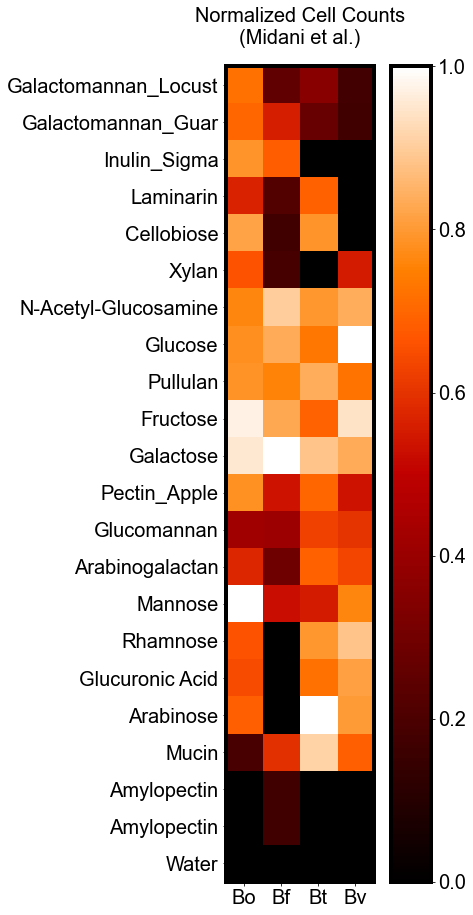

In [31]:
fig,ax = plt.subplots(figsize=[6,15])

toplot = norm_merged.loc[:,['BO','BF','BT','BV']]
h = ax.imshow(toplot,cmap='gist_heat')#cmap,norm=norm) # gist_heat, Reds, YlGnBu
c = plt.colorbar(h)

ax.set_title('Normalized Cell Counts\n(Midani et al.)',fontsize=20,y=1.02)

plt.setp(ax,yticks=range(toplot.shape[0]),yticklabels=norm_merged.Midani.values);
plt.setp(ax,xticks=range(4),xticklabels=['Bo','Bf','Bt','Bv'])

largeTickLabels(c.ax,fontsize=20)
largeTickLabels(ax,fontsize=20)
thicken_spines(c.ax,lw=4)
thicken_spines(ax,lw=4)

plt.savefig(ParentPath + '/figures/norm_heatmap_midani.pdf',bbox_inches='tight')

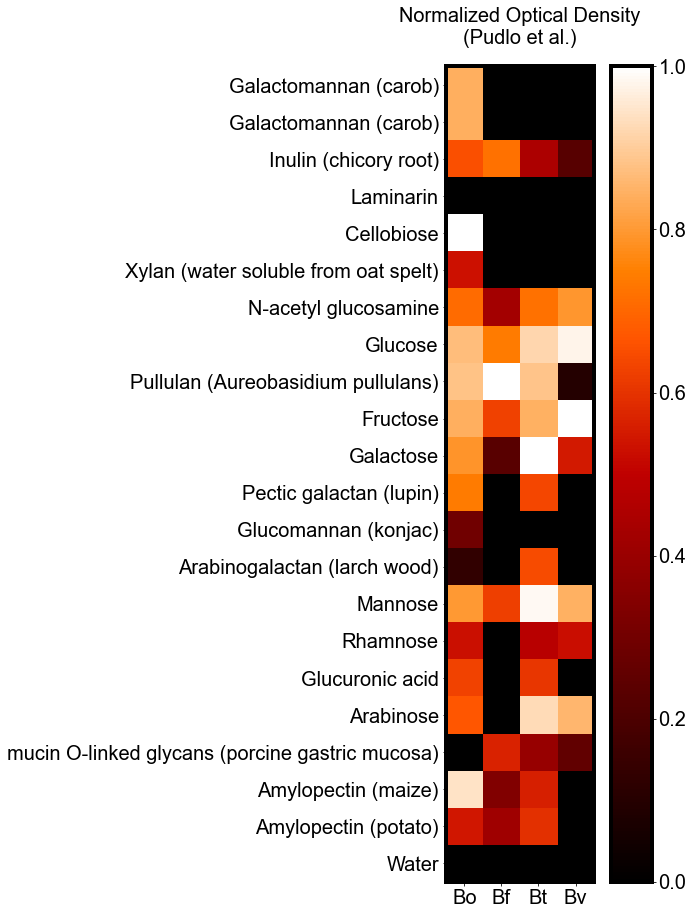

In [32]:

fig,ax = plt.subplots(figsize=[6,15])

toplot = norm_merged.loc[:,['B. ovatus','B. fragilis','B. thetaiotaomicron','B. vulgatus']]
h = ax.imshow(toplot,cmap='gist_heat')#cmap,norm=norm) # gist_heat, Reds, YlGnBu
c = plt.colorbar(h)

ax.set_title('Normalized Optical Density\n(Pudlo et al.)',fontsize=20,y=1.02)

plt.setp(ax,yticks=range(toplot.shape[0]),yticklabels=norm_merged.Pudlo.values);
plt.setp(ax,xticks=range(4),xticklabels=['Bo','Bf','Bt','Bv'])

largeTickLabels(c.ax,fontsize=20)
largeTickLabels(ax,fontsize=20)
thicken_spines(c.ax,lw=4)
thicken_spines(ax,lw=4)

plt.savefig(ParentPath + '/figures/norm_heatmap_pudlo.pdf',bbox_inches='tight')